# IRIS
This notebook contains analysis of various clustering and classification algorithms on IRIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb   # statistical plots for python 
from sklearn.decomposition import PCA    #for visualizing in 2D
algorithms = ["K-Means","KNN","nb","l","nn","svm","db"]

## IRIS Dataset

<IPython.core.display.Javascript object>


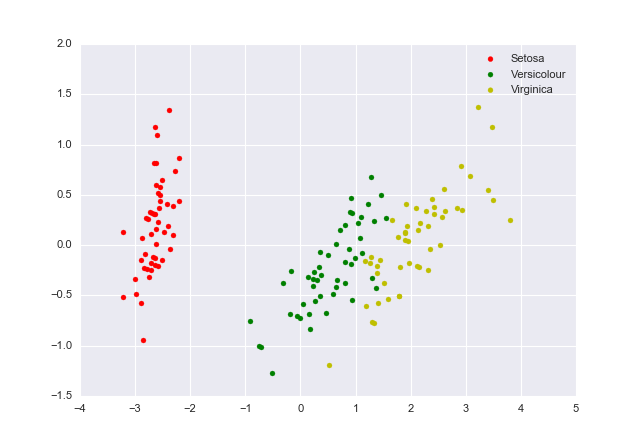

In [2]:
IRIS = pd.read_excel("G:/E/ML/PROJECT DATASETS.xlsx",sheetname="IRIS",skiprows = 4)
writer = pd.ExcelWriter("IRIS.xlsx")
IRIS = IRIS.drop("Species",axis = 1)
IRIS = IRIS.drop("Count",axis = 1)
IRIS_label = IRIS["Class"].copy(deep = True)
IRIS = IRIS.drop("Class",axis = 1)
#This plots the original dataset using PCA
%matplotlib notebook
import matplotlib.pyplot as plt
shrink = PCA(n_components = 2)
data_2d = shrink.fit_transform(IRIS)
setosa_data_2d = data_2d[0:50,:]
verico_data_2d = data_2d[50:100,:]
virginia_data_2d = data_2d[100:150,:]
plt.scatter(setosa_data_2d[:,0],setosa_data_2d[:,1],color = 'r',label = "Setosa")
plt.scatter(verico_data_2d[:,0],verico_data_2d[:,1],color = 'g',label = 'Versicolour')
plt.scatter(virginia_data_2d[:,0],virginia_data_2d[:,1],color = 'y',label = "Virginica")
plt.legend()

In [3]:
#Split the data into test and train. Seed everywhere is 200
myseed = 250 
#RANDOM SAMPLING OF 80% data
IRIS_train = IRIS.sample(frac=0.8,random_state=myseed)

"""IMPORTANT VARIABLE.. IRIS_test is currently for the whole dataset. FOR DATA UNUNSED IN TRAINING, IT IS
    IRIS_test = IRIS.drop(IRIS_train.index)
"""
IRIS_test = IRIS

#Retriving corresponding labels for the test and train datasets
IRIS_train_label = IRIS_label[IRIS_train.index]
IRIS_test_label = IRIS_label[IRIS_test.index]


In [4]:
#IRIS cateogories saved for later
IRIS_label = ["Setosa"," Veri","Virginia"]

#making a dict for precision, recall, f1, accuracy
p = dict()
r = dict()
f1 = dict()
acc = dict()
method = dict()

### Kmeans for IRIS


In [5]:
from sklearn.cluster import KMeans
kmeans_IRIS = KMeans(n_clusters=3, random_state=myseed).fit(IRIS_train)
cluster_assignments_IRIS = kmeans_IRIS.predict(IRIS_test)
centroids = kmeans_IRIS.cluster_centers_


<IPython.core.display.Javascript object>


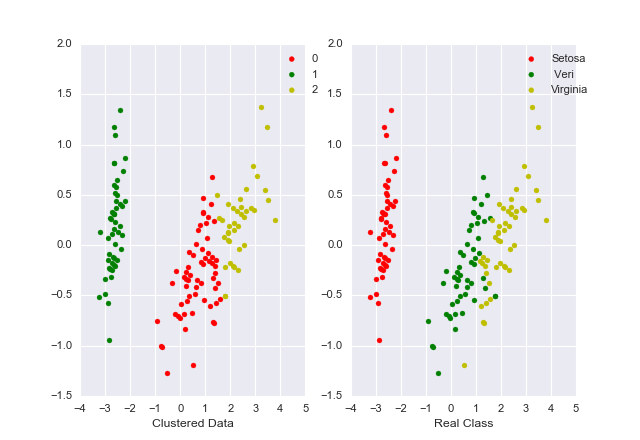

In [6]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()


#Making a function for scatterplot after prediciton

def scatterprediction(data_2d, IRIS_test, prediction, a, b, c,noOfClasses, start = 0,labels = None):
    
    ax = fig.add_subplot(a,b,c) #a,b,c  are subplot parameters
    colorplate = ['r','g','y','b','o']
    if not labels:
        labels = [i for i in range(start,noOfClasses + start)]

    for classnumber in range(start,noOfClasses+start):
        i_data_2d = np.array([data_2d[IRIS_test.index[i]] for i in range(IRIS_test.shape[0]) if prediction[i] == classnumber])
        ax.scatter(i_data_2d[:,0],i_data_2d[:,1],color = colorplate[classnumber - start] ,label = labels[classnumber- start])
    ax.legend(bbox_to_anchor=(1.1,1))

    return ax


ax1 = scatterprediction(data_2d,IRIS_test,cluster_assignments_IRIS,1,2,1,3)
ax1.set_xlabel("Clustered Data")

#Original Data
ax2 = scatterprediction(data_2d,IRIS_test,IRIS_test_label,1,2,2,3,start=1,labels = IRIS_label)
ax2.set_xlabel("Real Class")


In [7]:
#Clsters are numbered 0,1,2 but the classes are 1,2,3. Moreover Class 0 will not always be in CLuster 0.
#I'm changing the cluster assignments to match the class names. eg if cluster 0 has majority of class 1 as variables,
#I'm labelling the cluster as 0 instead of 1 so that it is easy to read and compare

cluster_assignments_IRIS[cluster_assignments_IRIS == 2]  = 3
cluster_assignments_IRIS[cluster_assignments_IRIS == 0]  = 2


In [8]:
#Calculating and visualizing the confusion matrix for TN TP FP FN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


def plotheatmap(labels,prediction,fig,a=1,b=1,c=1):
    ax = fig.add_subplot(a,b,c)
    confx = confusion_matrix(labels,prediction)
    sb.heatmap(confx,annot= True)
    ax.set_xticklabels(["Setosa"," Veri","Virginia"])
    ax.set_yticklabels(["Virginia","Veri","Setosa"])
    return ax
#precision recall and F1 
def prf1(labels,prediction,method = ""):
    p,r,f1,_ = precision_recall_fscore_support(labels,prediction)
    acc = accuracy_score(labels,prediction)
    print "For",method
    print "           class1       class2       class3"
    print "precision", p
    print "recall   ", r
    print "F1       ", f1
    print "Accuracy ", acc
    return p,r,f1,acc

<IPython.core.display.Javascript object>


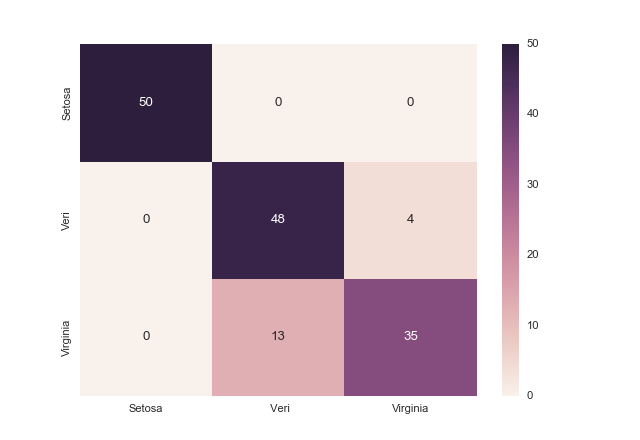

In [9]:
fig = plt.figure()

plotheatmap(IRIS_test_label,cluster_assignments_IRIS,fig)


In [10]:
p["K-Means"],r["K-Means"],f1["K-Means"],acc["K-Means"] = prf1(IRIS_test_label,cluster_assignments_IRIS,"Kmeans")

For Kmeans
           class1       class2       class3
precision [ 1.          0.78688525  0.8974359 ]
recall    [ 1.          0.92307692  0.72916667]
F1        [ 1.          0.84955752  0.8045977 ]
Accuracy  0.886666666667


In [11]:
#Saving results in Excel file: IRIS ,sheet : Kmeans
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["Cluster"] = cluster_assignments_IRIS
temp.to_excel(writer,sheet_name = "Kmeans")

###  KNN IRIS

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#There are many explorations possible in KNN, Weights can be uniform or distance based. I'm exploring the Weights for k=5 fixed
k = 5
Knn = [1,2]
prediction = [1,2]
weights = ["uniform","distance"]
#creating different objects for different number of neighbours
for i in range(2):
    Knn[i] = KNeighborsClassifier(n_neighbors=k , weights=weights[i]).fit(IRIS_train,IRIS_train_label)
    prediction[i] = Knn[i].predict(IRIS_test)
    

<IPython.core.display.Javascript object>


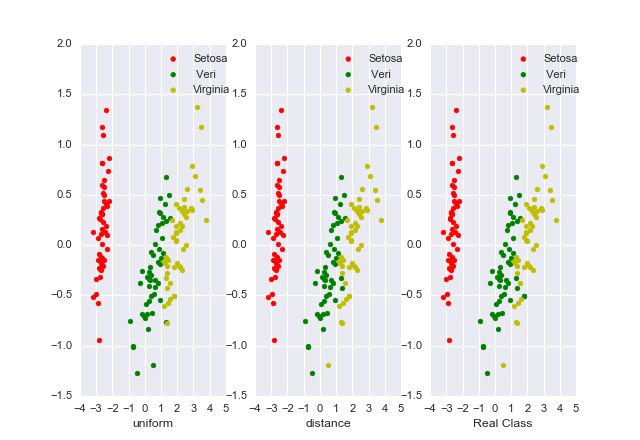

In [13]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

ax = [i for i in range(len(prediction))]
method['KNN'] = ["uniform","distance"]
for i in range(len(ax)):
    ax[i] = scatterprediction(data_2d,IRIS_test,prediction[i],1,3,i+1,3,start = 1,labels = IRIS_label)
    ax[i].set_xlabel(method['KNN'][i])


ax2 = scatterprediction(data_2d,IRIS_test,IRIS_test_label,1,3,3,3,start=1,labels = IRIS_label)
ax2.set_xlabel("Real Class")


<IPython.core.display.Javascript object>


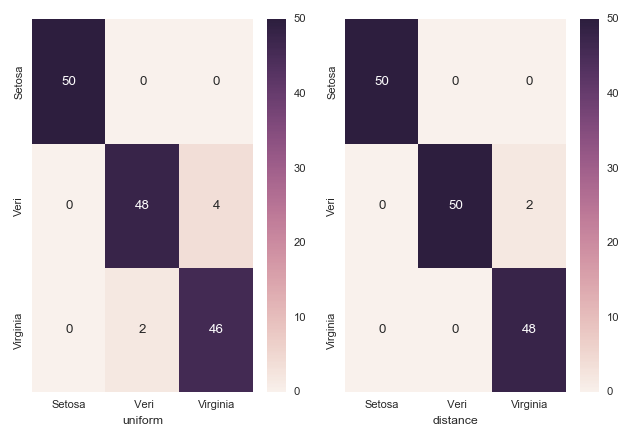

In [14]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()

ax = [i for i in range(len(prediction))]
for i in range(len(prediction)):
    temp =plotheatmap(IRIS_test_label,prediction[i],fig,1,2,i+1)
    temp.set_xlabel(method['KNN'][i])
fig.tight_layout()

In [15]:
p["KNN"] = [i for i in range(len(prediction))]
r['KNN'] = [i for i in range(len(prediction))]
f1['KNN'] = [i for i in range(len(prediction))]
acc['KNN'] = [i for i in range(len(prediction))]
for i in range(len(prediction)):
    p["KNN"][i],r['KNN'][i],f1['KNN'][i],acc['KNN'][i] = prf1(IRIS_test_label,prediction[i],"KNN "+method['KNN'][i])
    

For KNN uniform
           class1       class2       class3
precision [ 1.    0.96  0.92]
recall    [ 1.          0.92307692  0.95833333]
F1        [ 1.          0.94117647  0.93877551]
Accuracy  0.96
For KNN distance
           class1       class2       class3
precision [ 1.    1.    0.96]
recall    [ 1.          0.96153846  1.        ]
F1        [ 1.          0.98039216  0.97959184]
Accuracy  0.986666666667


In [16]:
#saving results of KNN into spreadsheet KNN
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["Class_uniform"] = prediction[0]
temp["Class_distance"] = prediction[1]
temp.to_excel(writer,sheet_name = "KNN")

### Naive Bayes 

In [17]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB().fit(IRIS_train,IRIS_train_label)
prediction = naive.predict(IRIS_test)


<IPython.core.display.Javascript object>


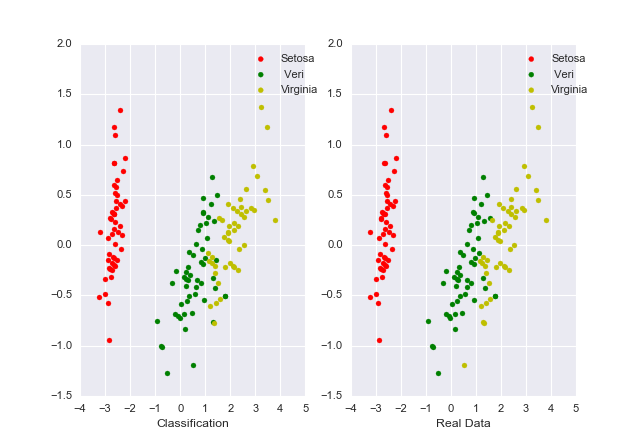

In [18]:
%matplotlib notebook
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

temp = scatterprediction(data_2d,IRIS_test,prediction,1,2,1,3,1,labels = IRIS_label)
temp.set_xlabel("Classification")
temp = scatterprediction(data_2d,IRIS_test,IRIS_test_label,1,2,2,3,1,labels = IRIS_label)
temp.set_xlabel("Real Data")

<IPython.core.display.Javascript object>


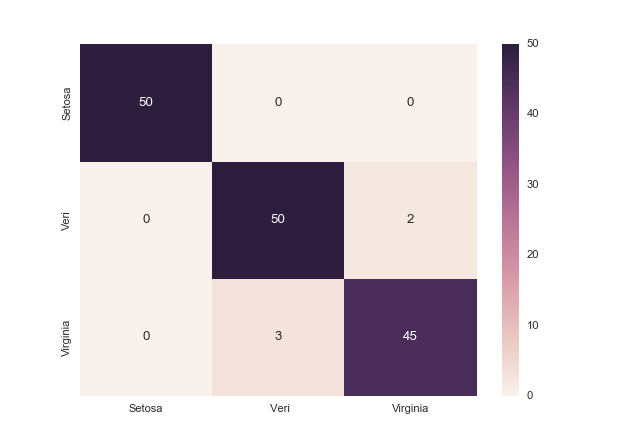

For Naive
           class1       class2       class3
precision [ 1.          0.94339623  0.95744681]
recall    [ 1.          0.96153846  0.9375    ]
F1        [ 1.          0.95238095  0.94736842]
Accuracy  0.966666666667


In [19]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
plotheatmap(IRIS_test_label,prediction,fig)
p['nb'],r['nb'],f1['nb'],acc['nb'] = prf1(IRIS_test_label,prediction,"Naive")

In [20]:
#saving results of Naive into spreadsheet Naive
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["Classification"] = prediction
temp.to_excel(writer,sheet_name = "Naive")

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1e5).fit(IRIS_train,IRIS_train_label)
prediction = logistic.predict(IRIS_test)

<IPython.core.display.Javascript object>


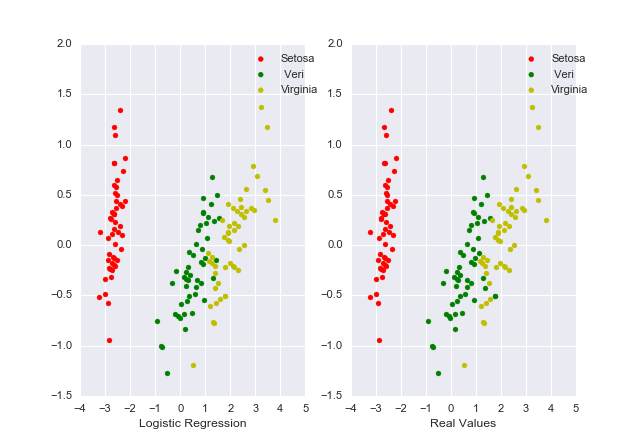

In [22]:
%matplotlib notebook
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = scatterprediction(data_2d,IRIS_test,prediction,1,2,1,3,start = 1,labels = IRIS_label)
ax1.set_xlabel("Logistic Regression")
ax2 = scatterprediction(data_2d,IRIS_test,IRIS_test_label,1,2,2,3,start = 1,labels = IRIS_label)
ax2.set_xlabel("Real Values")


<IPython.core.display.Javascript object>


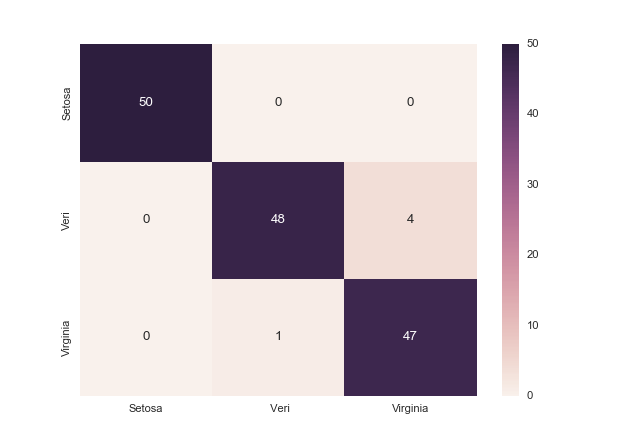

In [23]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
plotheatmap(IRIS_test_label,prediction,fig)

In [24]:
#F1 score and accuracy for prediction vs actual
p['l'],r['l'],f1['l'],acc['l'] = prf1(IRIS_test_label,prediction,"Logistic Regression")

For Logistic Regression
           class1       class2       class3
precision [ 1.          0.97959184  0.92156863]
recall    [ 1.          0.92307692  0.97916667]
F1        [ 1.          0.95049505  0.94949495]
Accuracy  0.966666666667


In [25]:
#saving results of Naive into spreadsheet Naive
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["Classification"] = prediction
temp.to_excel(writer,sheet_name = "logistic")

### Neural Network Classifier

In [26]:
from sklearn.neural_network import MLPClassifier
##Using smaller values to avoid overfitting. Sedding with myseed
neuralrelu = MLPClassifier(hidden_layer_sizes=(20,5,),activation="relu",alpha=0.001,max_iter=700,random_state=myseed).fit(IRIS_train,IRIS_train_label)
neuralsig = MLPClassifier(hidden_layer_sizes=(20,),activation="logistic",alpha=0.001,max_iter=700,random_state=myseed).fit(IRIS_train,IRIS_train_label)
prediction = [1,2]
prediction[0] = neuralrelu.predict(IRIS_test)
prediction[1] = neuralsig.predict(IRIS_test)

C:\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


<IPython.core.display.Javascript object>


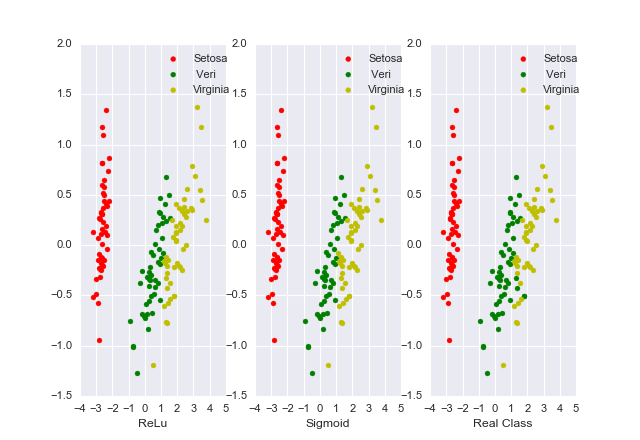

In [27]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
method['nn'] = ["ReLu","Sigmoid"]
for i in range(len(prediction)):
    ax = scatterprediction(data_2d,IRIS_test,prediction[i],1,3,i+1,3,1,labels = IRIS_label)
    ax.set_xlabel(method['nn'][i])
ax = scatterprediction(data_2d,IRIS_test,IRIS_test_label,1,3,3,3,1,labels = IRIS_label)
ax.set_xlabel("Real Class")


<IPython.core.display.Javascript object>


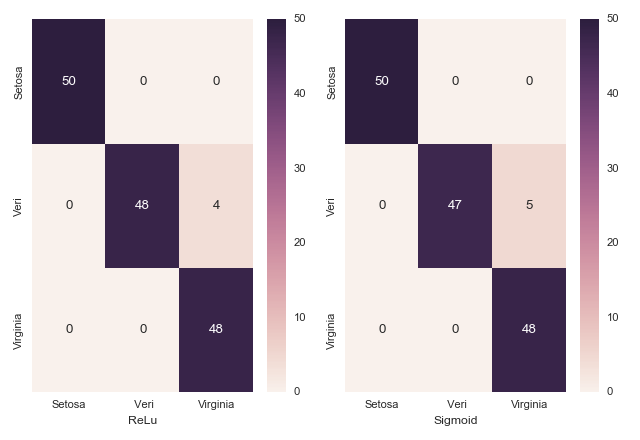

In [28]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
for i in range((len(prediction))):
    ax = plotheatmap(IRIS_test_label,prediction[i],fig,1,2,i+1)
    ax.set_xlabel(method['nn'][i])
fig.tight_layout()

In [29]:
#F1 score and accuracy for prediction vs actual
p['nn'] = [i for i in range(len(prediction))]
r['nn'] = [i for i in range(len(prediction))]
f1['nn'] = [i for i in range(len(prediction))]
acc['nn'] = [i for i in range(len(prediction))]

for i in range(len(prediction)):
    p['nn'][i],r['nn'][i],f1['nn'][i],acc['nn'][i] = prf1(IRIS_test_label,prediction[i],"NN "+method['nn'][i])


For NN ReLu
           class1       class2       class3
precision [ 1.          1.          0.92307692]
recall    [ 1.          0.92307692  1.        ]
F1        [ 1.    0.96  0.96]
Accuracy  0.973333333333
For NN Sigmoid
           class1       class2       class3
precision [ 1.          1.          0.90566038]
recall    [ 1.          0.90384615  1.        ]
F1        [ 1.          0.94949495  0.95049505]
Accuracy  0.966666666667


In [30]:
#saving results of NN into spreadsheet NN
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["Class_relu"] = prediction[0]
temp["Class_sigmoid"] = prediction[1]
temp.to_excel(writer,sheet_name = "NN")

### SVM

In [31]:
from sklearn import svm
C = 1.0                                    # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(IRIS_train, IRIS_train_label)         #fitting a straight hyperplane
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(IRIS_train, IRIS_train_label)   #transform via rbf kernal and then fit
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(IRIS_train, IRIS_train_label)   #3rd degree polynomial
lin_svc = svm.LinearSVC(C=C).fit(IRIS_train, IRIS_train_label)                     #differes in the error function. 
                                                                                    #It minimizes the squared hinge loss
method['svm'] = ["Linear","rbf","poly","LinSVM"]
prediction = [1,2,3,4]
prediction[0] = svc.predict(IRIS_test)
prediction[1] = rbf_svc.predict(IRIS_test)
prediction[2] = poly_svc.predict(IRIS_test)
prediction[3] = lin_svc.predict(IRIS_test)


<IPython.core.display.Javascript object>


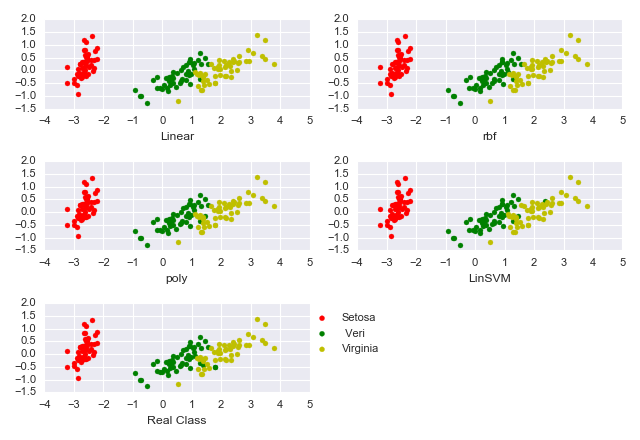

In [32]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(len(prediction)):
    ax = scatterprediction(data_2d,IRIS_test,prediction[i],3,2,i+1,3,1)
    ax.set_xlabel(method['svm'][i])
    ax.legend([])
    #Classification data linear kernel

ax = scatterprediction(data_2d,IRIS_test,IRIS_test_label,3,2,5,3,1,labels=IRIS_label)
ax.set_xlabel("Real Class")
ax.legend(bbox_to_anchor=(1.3,1.))
fig.tight_layout()

<IPython.core.display.Javascript object>


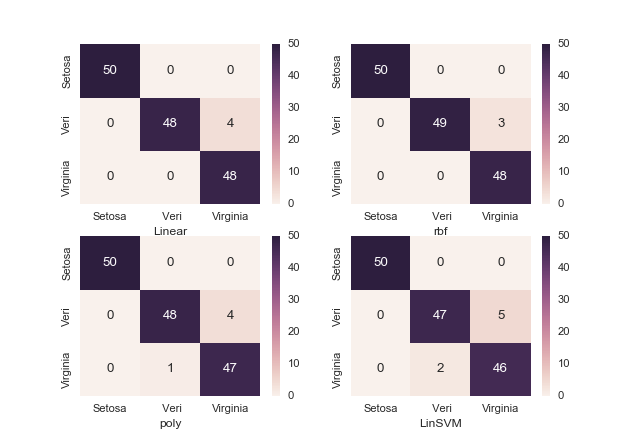

In [33]:
from sklearn.metrics import confusion_matrix

%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
for i in range(len(prediction)):
    ax = plotheatmap(IRIS_test_label,prediction[i],fig,2,2,i+1)
    ax.set_xlabel(method['svm'][i])


In [34]:
#F1 score and accuracy for prediction vs actual
p['svm'] = [i for i in range(len(prediction))]
r['svm'] = [i for i in range(len(prediction))]
f1['svm'] = [i for i in range(len(prediction))]
acc['svm'] = [i for i in range(len(prediction))]

for i in range(len(prediction)):
    p['svm'][i],r['svm'][i],f1['svm'][i],acc['svm'][i] = prf1(IRIS_test_label,prediction[i],"SVM "+method['svm'][i])


For SVM Linear
           class1       class2       class3
precision [ 1.          1.          0.92307692]
recall    [ 1.          0.92307692  1.        ]
F1        [ 1.    0.96  0.96]
Accuracy  0.973333333333
For SVM rbf
           class1       class2       class3
precision [ 1.          1.          0.94117647]
recall    [ 1.          0.94230769  1.        ]
F1        [ 1.          0.97029703  0.96969697]
Accuracy  0.98
For SVM poly
           class1       class2       class3
precision [ 1.          0.97959184  0.92156863]
recall    [ 1.          0.92307692  0.97916667]
F1        [ 1.          0.95049505  0.94949495]
Accuracy  0.966666666667
For SVM LinSVM
           class1       class2       class3
precision [ 1.          0.95918367  0.90196078]
recall    [ 1.          0.90384615  0.95833333]
F1        [ 1.          0.93069307  0.92929293]
Accuracy  0.953333333333


In [35]:
#saving results of NN into spreadsheet NN
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["Class_linear"] = prediction[0]
temp["Class_rbf"] = prediction[1]
temp["Class_poly"] = prediction[2]
temp["Class_linearSVC"] = prediction[3]
temp.to_excel(writer,sheet_name = "SVM")

### DBSCAN for IRIS clustering

In [36]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
dbscan = DBSCAN(eps=1, min_samples=15).fit(IRIS_test)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
cluster_assignments_IRIS = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_assignments_IRIS)) - (1 if -1 in cluster_assignments_IRIS else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(IRIS_test_label, cluster_assignments_IRIS))
print("Completeness: %0.3f" % metrics.completeness_score(IRIS_test_label,cluster_assignments_IRIS))
print("V-measure: %0.3f" % metrics.v_measure_score(IRIS_test_label, cluster_assignments_IRIS))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(IRIS_test_label, cluster_assignments_IRIS))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(IRIS_test_label, cluster_assignments_IRIS))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(IRIS_test, cluster_assignments_IRIS))

Estimated number of clusters: 2
Homogeneity: 0.589
Completeness: 0.921
V-measure: 0.718
Adjusted Rand Index: 0.566
Adjusted Mutual Information: 0.583
Silhouette Coefficient: 0.511


In [37]:
# shifting cluster naming appropriately 
cluster_assignments_IRIS[cluster_assignments_IRIS == 1] = 2
cluster_assignments_IRIS[cluster_assignments_IRIS == 0] = 1
#labelling it as an outlier with higher value than number of classes!. -1 as class breaks my heatmap function
cluster_assignments_IRIS[cluster_assignments_IRIS == -1] = 100

<IPython.core.display.Javascript object>


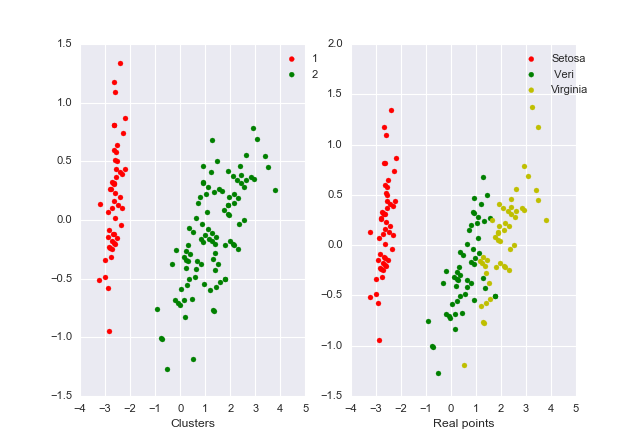

In [38]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

ax = scatterprediction(data_2d,IRIS_test,cluster_assignments_IRIS,1,2,1,2,1)
ax.set_xlabel("Clusters")
ax1 = scatterprediction(data_2d,IRIS_test,IRIS_test_label,1,2,2,3,1,labels =IRIS_label )
ax1.set_xlabel("Real points")


Density based have a problem with higher dimension data. Smaller epsions or less number of min_sample tend to 
label every datapoint as an outlier. 

<IPython.core.display.Javascript object>


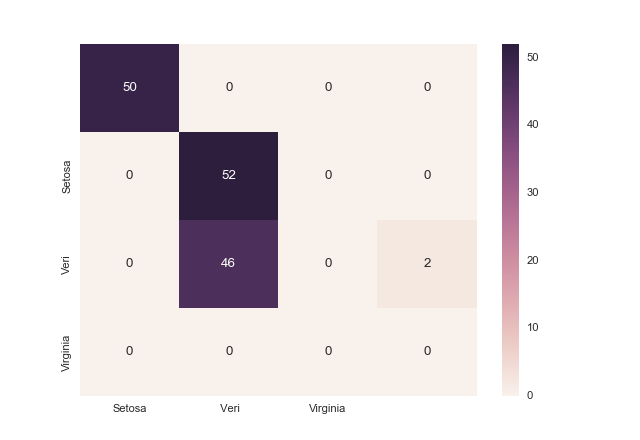

In [39]:
plotheatmap(IRIS_test_label,cluster_assignments_IRIS,plt.figure(),1,1,1)

In [40]:
p['db'],r['db'],f1['db'],acc['db'] = prf1(IRIS_test_label,cluster_assignments_IRIS,"DBSCAN")

For DBSCAN
           class1       class2       class3
precision [ 1.          0.53061224  0.          0.        ]
recall    [ 1.  1.  0.  0.]
F1        [ 1.          0.69333333  0.          0.        ]
Accuracy  0.68


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [41]:
#saving results of DBSCAN into spreadsheet DBSCAN
temp = IRIS_test.copy(deep=True)
temp['Class'] = IRIS_test_label
temp["cluster"] = cluster_assignments_IRIS
temp.to_excel(writer,sheet_name = "DBSCAN")

The pre-implemented functions of OPTICS for clustering seem to have lots of negative reviews in stack overflow forum. Will implement that later 
Saving every change to writer object

In [42]:
writem = pd.ExcelWriter("G:/E/ML/metrics.xlsx")
features = ["precision","recall","f1","accuracy"]
allalgos = []


for i in features:
    print "\t\t",i, "\t",
print
for i in range(len(algorithms)):
    if type(p[algorithms[i]]) != list:
        allalgos.append(algorithms[i])
        print algorithms[i],"\t",
        print p[algorithms[i]].mean(),"\t\t",
        print r[algorithms[i]].mean(),"\t\t",
        print f1[algorithms[i]].mean(),"\t\t",
        print acc[algorithms[i]]

    else:
        for index,item in enumerate(method[algorithms[i]]):
            allalgos.append(algorithms[i]+item)
            print algorithms[i],item,"\t",
            print p[algorithms[i]][index].mean(),"\t\t",
            print r[algorithms[i]][index].mean(),"\t\t",
            print f1[algorithms[i]][index].mean(),"\t\t",
            print acc[algorithms[i]][index]

d = np.zeros((len(allalgos),len(features)))
rowno = 0
for i in range(len(algorithms)):
    if type(p[algorithms[i]]) != list:
        d[rowno][0] = p[algorithms[i]].mean()
        d[rowno][1] = r[algorithms[i]].mean()
        d[rowno][2] = f1[algorithms[i]].mean()
        d[rowno][3] = acc[algorithms[i]]
        rowno +=1

    else:
        for index,item in enumerate(method[algorithms[i]]):
            d[rowno][0] = p[algorithms[i]][index].mean()
            d[rowno][1] = r[algorithms[i]][index].mean()
            d[rowno][2] = f1[algorithms[i]][index].mean()
            d[rowno][3] = acc[algorithms[i]][index]
            rowno +=1

stats = pd.DataFrame(d,columns=features)
stats["Algorithms"] = allalgos
stats.to_excel(writem,sheet_name="IRIS")
writem.save()

		precision 			recall 			f1 			accuracy 	
K-Means 	0.894773714446 		0.884081196581 		0.884718407758 		0.886666666667
KNN uniform 	0.96 		0.96047008547 		0.959983993597 		0.96
KNN distance 	0.986666666667 		0.987179487179 		0.986661331199 		0.986666666667
nb 	0.966947678309 		0.966346153846 		0.966583124478 		0.966666666667
l 	0.967053488062 		0.967414529915 		0.966663333 		0.966666666667
nn ReLu 	0.974358974359 		0.974358974359 		0.973333333333 		0.973333333333
nn Sigmoid 	0.968553459119 		0.967948717949 		0.966663333 		0.966666666667
svm Linear 	0.974358974359 		0.974358974359 		0.973333333333 		0.973333333333
svm rbf 	0.980392156863 		0.980769230769 		0.9799979998 		0.98
svm poly 	0.967053488062 		0.967414529915 		0.966663333 		0.966666666667
svm LinSVM 	0.953714819261 		0.95405982906 		0.9533286662 		0.953333333333
db 	0.382653061224 		0.5 		0.423333333333 		0.68
